In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [98]:
# My Features
file1='data/SPY_MIX_Y16_D.csv'
file2='data/SPY_MACD_RSI_Y16_D-Now.csv'
df_mix=pd.read_csv(file1,parse_dates=['Date/Time'],
                         index_col='Date/Time',dayfirst=True)
print(df_mix.info())

df_trend= pd.read_csv(file2,parse_dates=['Date/Time'],
                      index_col='Date/Time',dayfirst=True)
print(df_trend.info())

df_indy_features=pd.merge(left=df_mix,right=df_trend,how='inner',
                     right_index=True,left_index=True)
df_indy_features.drop( columns=['Ticker_x','Ticker_y'],inplace=True)

#df_indy_features=df_indy_features.loc['01-2020':'12-2022',:]
df_indy_features.info()
df_indy_features.tail()

data=df_indy_features.drop(columns=['Close'])
names = list(data.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1748 entries, 2016-01-04 to 2022-12-09
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             1748 non-null   object 
 1   Close              1748 non-null   float64
 2   Trend_MACD_RSI     1748 non-null   float64
 3   Trend_MACD_SIGNAL  1748 non-null   float64
dtypes: float64(3), object(1)
memory usage: 68.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1748 entries, 2016-01-04 to 2022-12-09
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ticker      1748 non-null   object 
 1   Trend_MACD  1748 non-null   float64
 2   Trend_RSI   1748 non-null   float64
dtypes: float64(2), object(1)
memory usage: 54.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1748 entries, 2016-01-04 to 2022-12-09
Data columns (total 5 columns):
 #   Column        

In [99]:
# df_indy_features=pd.read_csv('data/SPY_INDY_Y16.csv',parse_dates=['Date/Time'],
#                          index_col='Date/Time',dayfirst=True)
# df_indy_features.drop(columns=['Ticker','Price'],inplace=True)
# print(df_indy_features.info())

# data=df_indy_features
# names = list(data.columns)

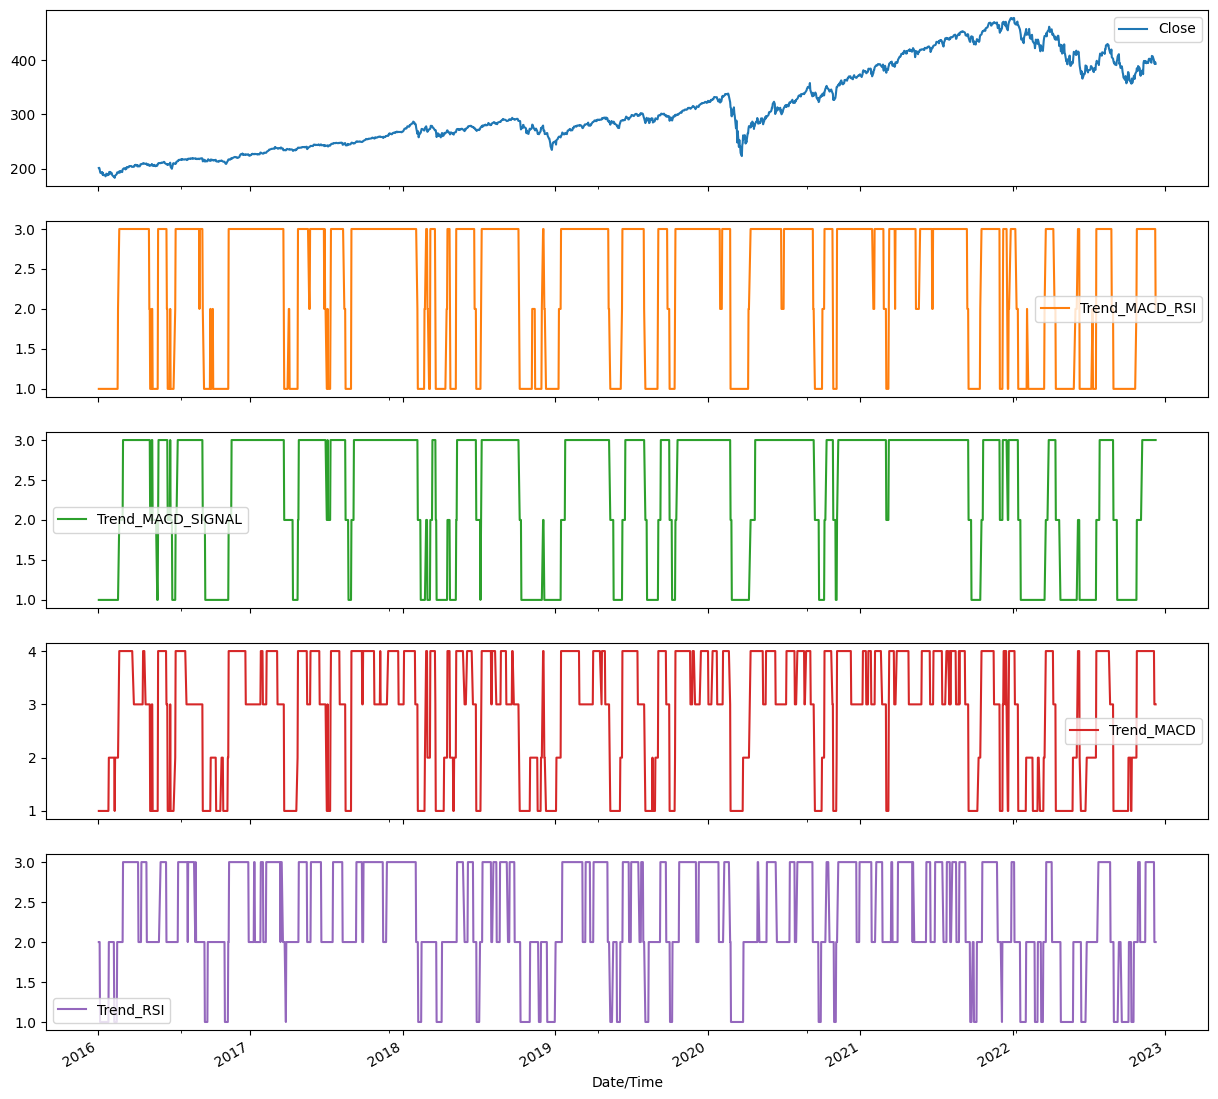

In [100]:
#plot from matplotlib import pyplot
df_indy_features.plot(kind='line',layout=(len(df_indy_features.columns),1),
                      sharex=True,subplots=True,figsize=(15, 3*len(df_indy_features.columns)))
pyplot.show()      


#plot by plotly
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=len(df_indy_features.columns), cols=1,shared_xaxes=True)
# col_row=1
# for col in df_indy_features.columns:
    
#     fig.append_trace(go.Scatter(
#         x=df_indy_features.index,
#         y=df_indy_features[col]
#     ), row=col_row, col=1)
#     col_row=col_row+1

# fig.update_layout(
    
#     height=800, width=800, title_text="Price Chart"


# )
# fig.show()

# Correlation Feature

In [101]:
print(names)
print(data.info())

correlations = data.corr()
correlations=correlations.round(2)
print(correlations)



['Trend_MACD_RSI', 'Trend_MACD_SIGNAL', 'Trend_MACD', 'Trend_RSI']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1748 entries, 2016-01-04 to 2022-12-09
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Trend_MACD_RSI     1748 non-null   float64
 1   Trend_MACD_SIGNAL  1748 non-null   float64
 2   Trend_MACD         1748 non-null   float64
 3   Trend_RSI          1748 non-null   float64
dtypes: float64(4)
memory usage: 132.8 KB
None
                   Trend_MACD_RSI  Trend_MACD_SIGNAL  Trend_MACD  Trend_RSI
Trend_MACD_RSI               1.00               0.88        0.92       0.73
Trend_MACD_SIGNAL            0.88               1.00        0.81       0.69
Trend_MACD                   0.92               0.81        1.00       0.76
Trend_RSI                    0.73               0.69        0.76       1.00


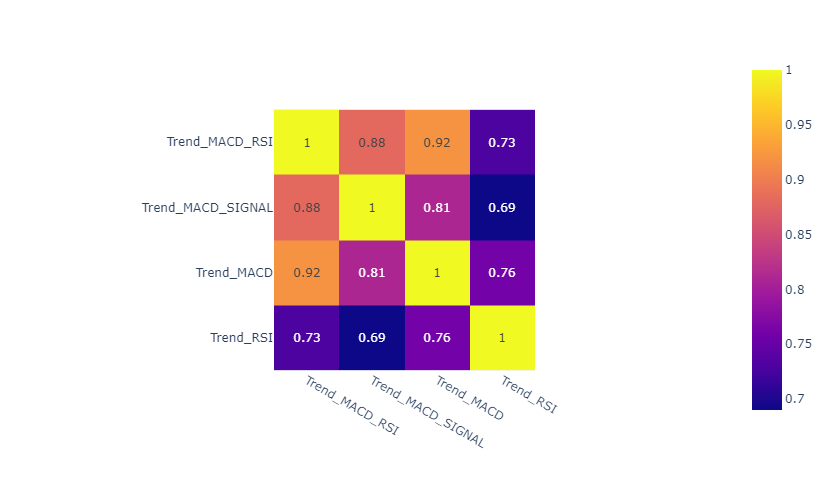

In [102]:

import plotly.express as px
fig = px.imshow(correlations,width=500,height=500,text_auto=True)
fig.show()


#plot correlation matrix
# fig = pyplot.figure(figsize=(5,5))
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# pyplot.show()

In [103]:
#https://lengyi.medium.com/categorical-variable-chi-squared-test-29a625f55618

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [104]:
# pair_cols=['Trend_RSI','Trend_MACD']
pair_cols=['Trend_MACD_RSI','Trend_MACD']
dfCHiTest=df_indy_features.copy()[pair_cols]
dfCHiTest['Count']=1
dfCHiTest.head()

,Trend_MACD_RSI,Trend_MACD,Count
Date/Time,,,
2016-01-04,1.0,1.0,1
2016-01-05,1.0,1.0,1
2016-01-06,1.0,1.0,1
2016-01-07,1.0,1.0,1
2016-01-08,1.0,1.0,1


In [105]:
#dfGroup =dfCHiTest.groupby(pair_cols).size()
dfGroup =dfCHiTest.groupby(pair_cols,as_index=False)['Count'].count()
dfGroup.info()
print(dfGroup)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Trend_MACD_RSI  8 non-null      float64
 1   Trend_MACD      8 non-null      float64
 2   Count           8 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes
   Trend_MACD_RSI  Trend_MACD  Count
0             1.0         1.0    376
1             1.0         2.0    123
2             2.0         1.0      5
3             2.0         2.0     38
4             2.0         3.0     71
5             2.0         4.0      1
6             3.0         3.0    374
7             3.0         4.0    760


In [106]:
#Pivot table
dfPivot = dfCHiTest.pivot_table(index = pair_cols[0], columns = pair_cols[1],values='Count',  aggfunc = 'count')
dfPivot.fillna(value=0,inplace=True)
dfPivot

Trend_MACD,1.0,2.0,3.0,4.0
Trend_MACD_RSI,,,,
1.0,376.0,123.0,0.0,0.0
2.0,5.0,38.0,71.0,1.0
3.0,0.0,0.0,374.0,760.0


In [107]:
chi2_test, p, dof, _ = chi2_contingency(dfPivot)
print(f'Chi-Squared test-statistic: {chi2_test:.5f}')
print(f'P-value: {p:.4f}')
#Interpret result by test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print(f'The critical value: {critical:.4f}')
if critical <= abs(chi2_test):
  print(f'Critical value: {critical:.4f} <= Chi-Squared test-statistic: {abs(chi2_test):.4f}')
  print('Dependent (Relationship)')
else:
  print('Independent (No relationship)')

Chi-Squared test-statistic: 1845.03067
P-value: 0.0000
The critical value: 12.5916
Critical value: 12.5916 <= Chi-Squared test-statistic: 1845.0307
Dependent (Relationship)
